### EDA
If you want to see what the LLM was actually outputting. Please see the "raw" notebooks in the other folder. This Notebook cleans up some of the outputs from the LLM. I give some commentary on the cleaning that was done.

I think one should be refining/curating the results they get from LLMs rather than comepletely relying on it. Sometimes the output isnt suitable and is missing a few things. Also, Since we work with data that the LLM cannot see, intervention is necessary.

In [16]:
#IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)

This is my first time using an LLM for code generation. I'm not too sure what to ask it first. How about:

**Prompt:** An exploratory data analysis using pandas. examine pairwise relationships

**Result:**

In [21]:
#quick summary
df = pd.read_csv('../Data/telco_data.csv')

print('df.head()\n\n',df.head())

print('\n\ndtypes\n\n', df.dtypes)
print('\n\ndf.describe()\n\n', df.describe())

df.head()

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  ... StreamingMovies        Contract PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  ...              No  Month-to-month              Yes           Electronic check          29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes  ...              No        One year               No               Mailed check          56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes  ...              No  Month-to-month              Yes               Mailed check          53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  ...              No        One year               No  Bank transfer (automatic)          42.30      1840.75    No
4  9237-HQITU  Female       

Removed some of the prints like .tail(). Added titles and spaced things out.

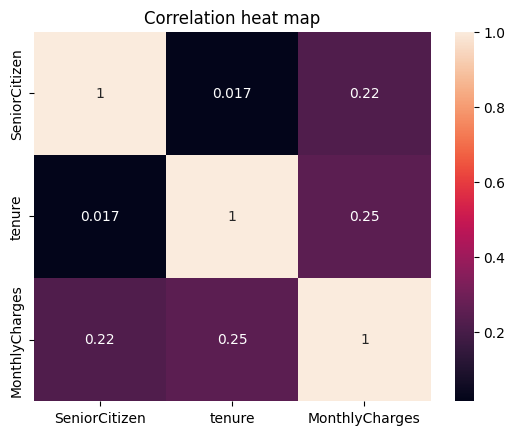

In [24]:
correlation_matrix = df.select_dtypes(include='number').corr()
ax = plt.axes()
sns.heatmap(correlation_matrix, annot=True, ax=ax)
ax.set_title('Correlation heat map')
plt.show()

Specified numeric columns so that correlations could be calculated. Added axes object so that i could add a title.

In [32]:
tab = pd.crosstab(
   index=df['gender'],
   columns=df['Churn'],
)

tab = tab/tab.sum(axis=1).values
tab = tab.round(2)
print('Cross table of gender and Churn\n', tab)

Cross table of gender and Churn
 Churn     No   Yes
gender            
Female  0.73  0.26
Male    0.75  0.26


Changed the cross tab to show yes/no proportions instead of nominal figures.

We have a lot of categorical variables. Let's examine them

**Prompt:** I have a pandas dataframe. For each column print the column name and its unique values unless the number of unique values is more than 10. If a column does have more than 10 unique values then just print the column name and the number of unique values it has.

**Result:**

In [38]:
print('Column unique values\n')

for col in df:
    unique_vals = df[col].unique()
    if len(unique_vals) > 10:
        print(str(col).ljust(17), len(unique_vals), 'VALUES')
    else:
        print(str(col).ljust(17), unique_vals)

Column unique values

customerID        7043 VALUES
gender            ['Female' 'Male']
SeniorCitizen     [0 1]
Partner           ['Yes' 'No']
Dependents        ['No' 'Yes']
tenure            73 VALUES
PhoneService      ['No' 'Yes']
MultipleLines     ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity    ['No' 'Yes' 'No internet service']
OnlineBackup      ['Yes' 'No' 'No internet service']
DeviceProtection  ['No' 'Yes' 'No internet service']
TechSupport       ['No' 'Yes' 'No internet service']
StreamingTV       ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract          ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod     ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges    1585 VALUES
TotalCharges      6531 VALUES
Churn             ['No' 'Yes']


Changed formatting to make things easier to read

Lets see the proportions of each value for each variable in our dataset

**Prompt:** I have a pandas dataframe. For each column that is for a categorical variable, I want to see the proportion of each unique value has.

**Result:**

In [73]:
categorical_cols = list(df.select_dtypes(exclude=['number']).columns)

#remove columns that we know ought not to be there
categorical_cols.remove('customerID')
categorical_cols.remove('TotalCharges')

proportions_dict = {}
for col in categorical_cols:
    counts = df[col].value_counts()
    proportions = counts / len(df)
    proportions_dict[col] = proportions
    print(proportions.round(2), '\n')

gender
Male      0.5
Female    0.5
Name: count, dtype: float64 

Partner
No     0.52
Yes    0.48
Name: count, dtype: float64 

Dependents
No     0.7
Yes    0.3
Name: count, dtype: float64 

PhoneService
Yes    0.9
No     0.1
Name: count, dtype: float64 

MultipleLines
No                  0.48
Yes                 0.42
No phone service    0.10
Name: count, dtype: float64 

InternetService
Fiber optic    0.44
DSL            0.34
No             0.22
Name: count, dtype: float64 

OnlineSecurity
No                     0.50
Yes                    0.29
No internet service    0.22
Name: count, dtype: float64 

OnlineBackup
No                     0.44
Yes                    0.34
No internet service    0.22
Name: count, dtype: float64 

DeviceProtection
No                     0.44
Yes                    0.34
No internet service    0.22
Name: count, dtype: float64 

TechSupport
No                     0.49
Yes                    0.29
No internet service    0.22
Name: count, dtype: float64 

Streami

It first made a dictionary and then printed that. Its fine but the print will be messy that way so i printed within the loop. Now things are more spaced out.

Follow up prompt

**Prompt:** Plot each of the proportions in a pie chart

**Result:**

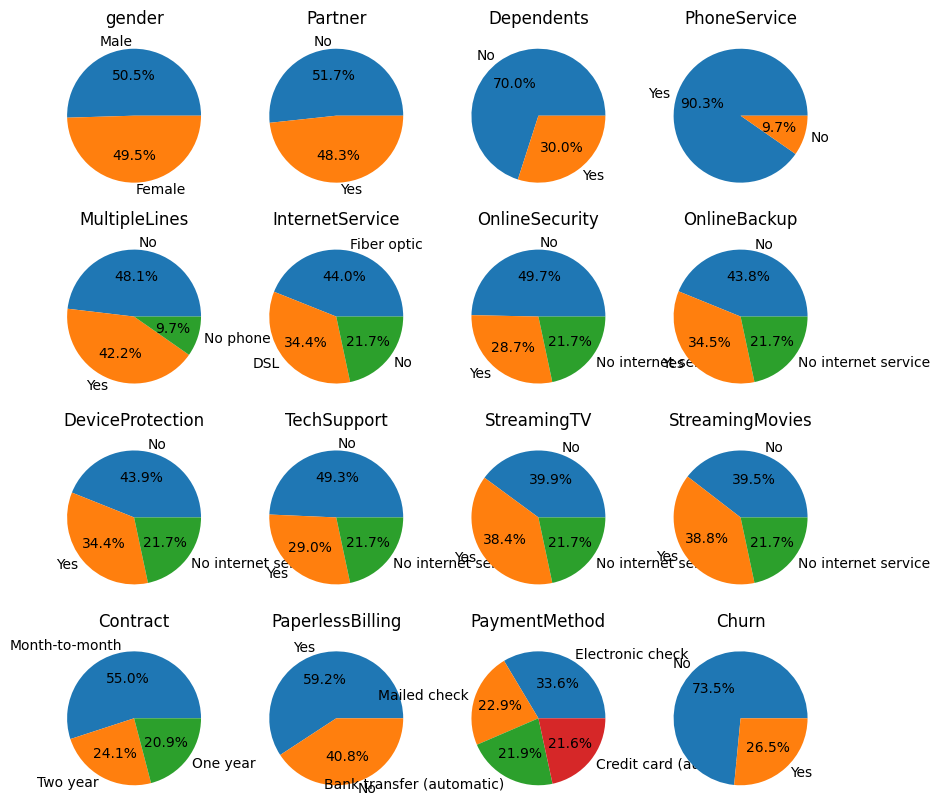

In [68]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for ax, (name, series) in zip(axs.flat, proportions_dict.items()):
   ax.pie(series, labels=series.index, autopct='%1.1f%%')
   ax.set_title(name)

Completely rewrote that one so that the charts were output as a neat grid. Ultimately, I should have specified this in the prompt.

Lets take a look at the distributions of our numeric features

**Prompt:** I have a pandas dataframe. Plot histograms and box plots for the columns that have dtypes of float or integer.

**Result:** 

tenure               Axes(0.125,0.11;0.352273x0.77)
MonthlyCharges    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

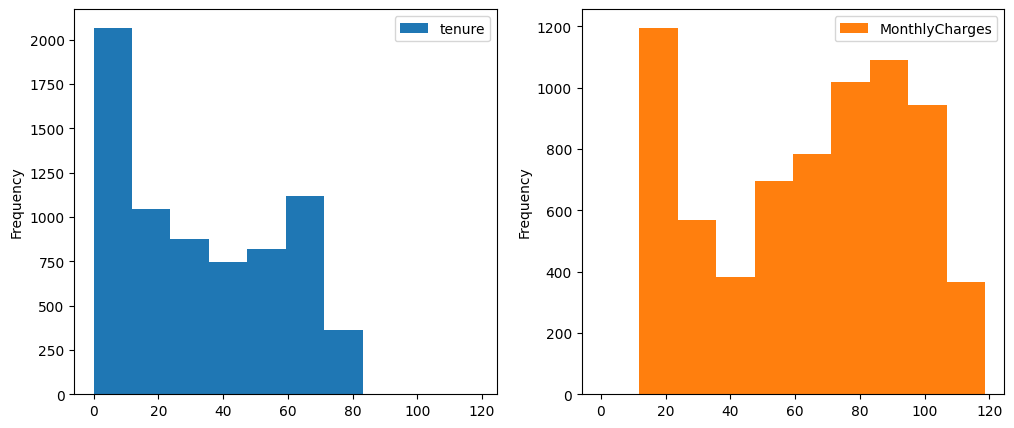

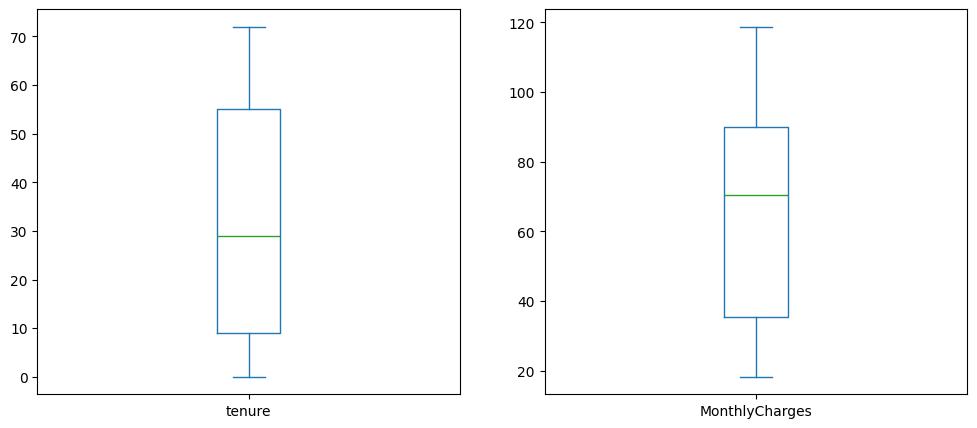

In [59]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

#remove binary senior citizen
df_numeric = df_numeric.drop('SeniorCitizen', axis=1)

df_numeric.plot(kind='hist', subplots=True, layout=(1,2), sharex=False, sharey=False, figsize=(12,5))
df_numeric.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False, figsize=(12,5))

Used pandas plot instead of for loop so that we can display charts as a grid.

Lets compare our categorical variables against the response variable Churn. This will be the most intricate prompt yet.

**Prompt:** I have a pandas dataframe. Create a list of column names where each column has less than 6 unique values. Create dummy variable columns from these in a separate dataframe. Attach a column called “Churn” from the old dataframe onto this new one. Get the mean value of each dummy variable column when “Churn” is equal to “Yes”. Plot these values in a vertical bar chart (order it from highest to lowest).

**Result:** 

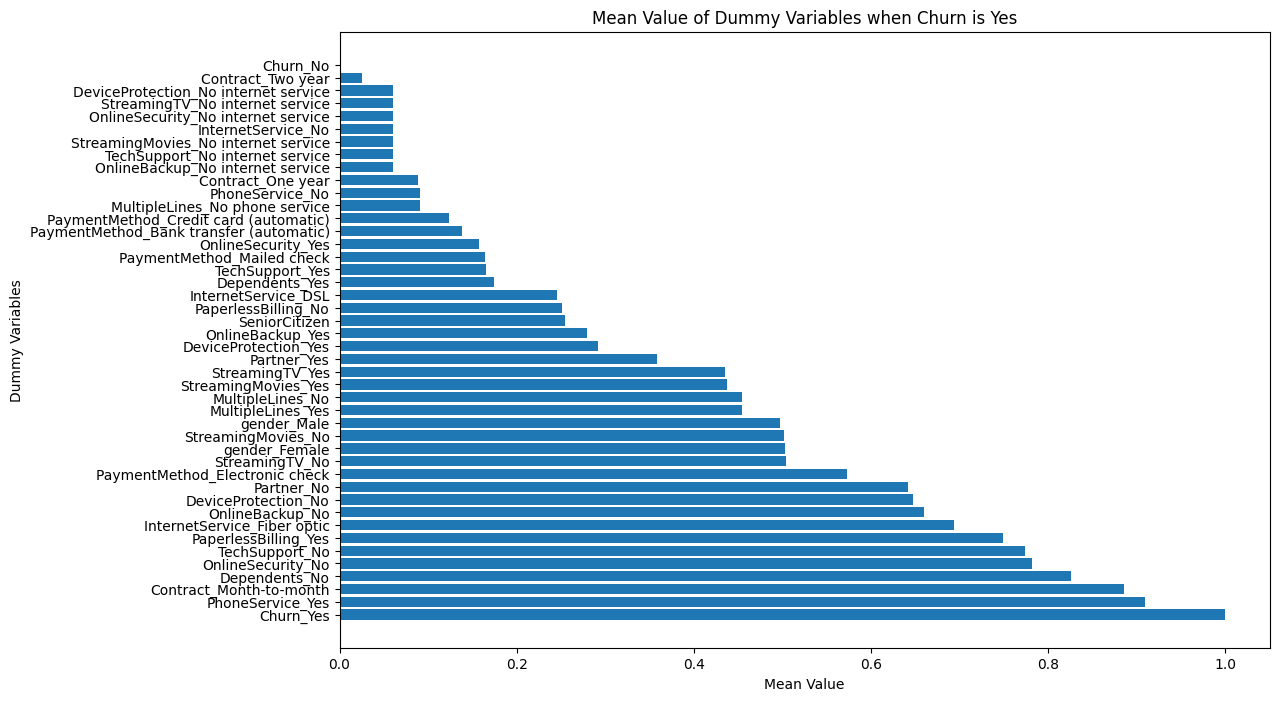

In [72]:
columns_to_dummify = [col for col in df.columns if df[col].nunique() < 6]
df_dummies = pd.get_dummies(df[columns_to_dummify])
df_dummies['Churn'] = df['Churn']
mean_values = df_dummies[df_dummies['Churn'] == 'Yes'].drop('Churn', axis=1).mean()

mean_values = mean_values.sort_values(ascending=False)
plt.figure(figsize = (12,8))
plt.barh(mean_values.index, mean_values.values)
plt.ylabel('Dummy Variables')
plt.xlabel('Mean Value')
plt.title('Mean Value of Dummy Variables when Churn is Yes')
plt.show()

Excluded the Churn column during the calculation of the mean. Threw in the output of the other prompt that asked it to order things highest to lowest. Change chart size so that it was mroe readable.



Let's leave the EDA there. This is a good companion. Clearly its been trained on stackoverflow (it keeps giving it as a source) and its suggestions do seem to align with the things I was seeing on that site many years ago when i was learning these libraries.
Its not perfect but part of the problem is me, I took a few things for granted and did not make my prompts specific enough.
What would be great is if the LLM could see your data as well - if it could go beyond just the coding side of things. I'm sure we'll see such a thing soon enough!